In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GRU, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Read data
df = pd.read_csv('data.csv')
# 쓸데없는 index 제거
df = df.drop(df.columns[0], axis=1)
#print(df.head())

train_hours = pd.to_datetime(df['_time'])
#print(train_hours.tail(15))

# moduleName = cosmos만 고르기
cosmos_df = df[df['chainName'] == "cosmos"]
#columns_to_keep = ['_time', 'cap', 'high24h', 'low24h', 'price','totalVolume', 'apr', 'bondedTokens', 'communityTokens', 'tps', 'priceBTC', 'Binance #01 (Deposit)-amountValue', 'Binance #02 (Deposit)-amountValue', 'Binance #03 (Withdraw)-amountValue', 'Binance #04 (Staking)-amountValue', 'Bitforex #01 (Deposit)-amountValue', 'Bithumb #02 (Withdraw)-amountValue', 'Bithumb #03-amountValue', 'Bithumb #05-amountValue', 'Coinbase #01-amountValue', 'Coinbase #03-amountValue', 'Coinbase #05-amountValue', 'Coinbase #06-amountValue', 'Coinbase #08-amountValue', 'Coinone #01(Deposit)-amountValue', 'Digfinex #01 (Deposit)-amountValue', 'DokiaCapital #01 (Validator)-amountValue', 'DokiaCapital #02 (Validator)-amountValue', 'HitBTC #02-amountValue', 'Ignite-amountValue', 'Interchain Foundation #01-amountValue', 'Interchain Foundation #02-amountValue', 'Kraken #01-amountValue', 'MEXC #01 (Deposit)-amountValue', 'OKK #01-amountValue', 'Upbit #01 (Deposit)-amountValue', 'Upbit #02 (Withdraw)-amountValue', 'Upbit #10 (Validator)-amountValue', 'Upbit #11 (Staking)-amountValue', 'Upbit #12 (Staking)-amountValue', 'Upbit #13 (Staking)-amountValue', 'Upbit #14 (Staking)-amountValue', 'Upbit #15 (Staking)-amountValue', 'Upbit #16 (Staking)-amountValue', 'Upbit #17 (Staking)-amountValue', 'Upbit #18 (Staking)-amountValue', 'Upbit #19 (Staking)-amountValue', 'Upbit #20 (Staking)-amountValue', 'bonded_tokens_pool-amountValue', 'distribution-amountValue', 'fee_collector-amountValue', 'gov-amountValue', 'not_bonded_tokens_pool-amountValue']
cosmos_df = cosmos_df.drop(columns=['chainName', 'ath', 'athDate', 'atl', 'atlDate', 'JUNO ATOM Pool-amountValue', 'JUNO NETA Pool-amountValue', 'JUNO OSMO Pool-amountValue',	'JUNO RAW Pool-amountValue',	'JUNO ATOM Pool-boxplot',	'JUNO NETA Pool-boxplot',	'JUNO OSMO Pool-boxplot',	'JUNO RAW Pool-boxplot'])
print(cosmos_df.shape)
# (2446, 5)

(2446, 111)


(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1944, 12, 20).
trainY shape == (1944, 1).
testX shape == (490, 12, 20).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_75 (GRU)                (None, 12, 8)             720       
                                                                 
 dropout_75 (Dropout)        (None, 12, 8)             0         
                                                                 
 gru_76 (GRU)                (None, 8)                 432       
                                                                 
 dropout_76 (Dropout)        (None, 8)                 0         
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_8_12/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 970us/step


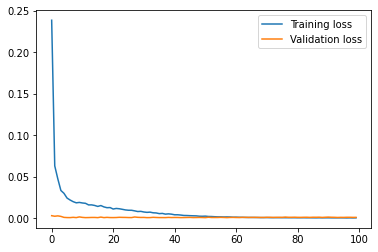

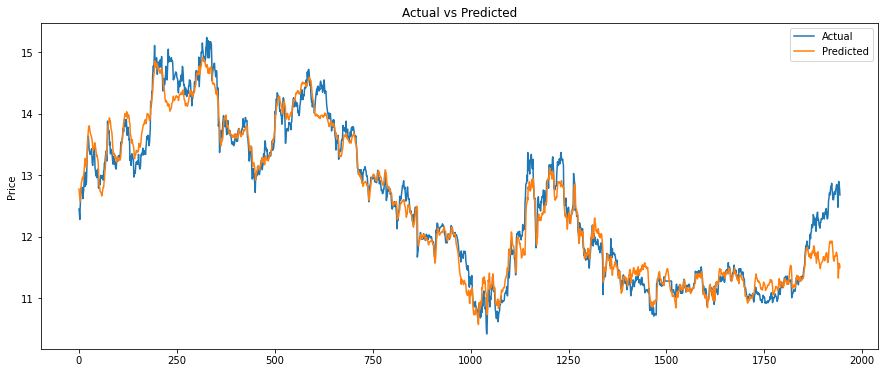

Train Score: 0.26 RMSE, 0.07 MSE, 0.18 MAE
16/16 [==============================] - 0s 1ms/step


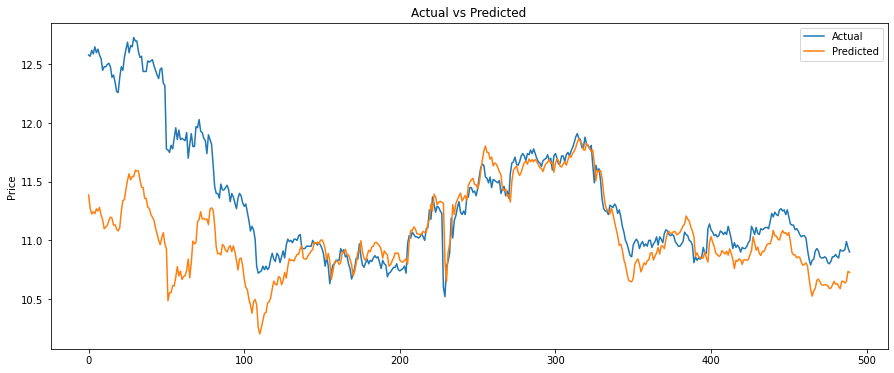

Test Score: 0.51 RMSE, 0.26 MSE, 0.32 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1932, 24, 20).
trainY shape == (1932, 1).
testX shape == (490, 24, 20).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_77 (GRU)                (None, 24, 8)             720       
                                                                 
 dropout_77 (Dropout)        (None, 24, 8)             0         
                                                                 
 gru_78 (GRU)                (None, 8)                 432       
                                                                 
 dropout_78 (Dropout)        (None, 8)                 0         
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_8_24/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 1ms/step


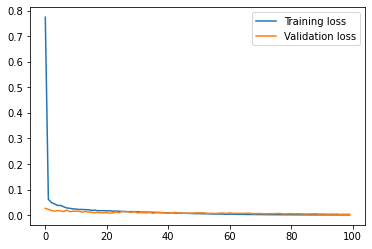

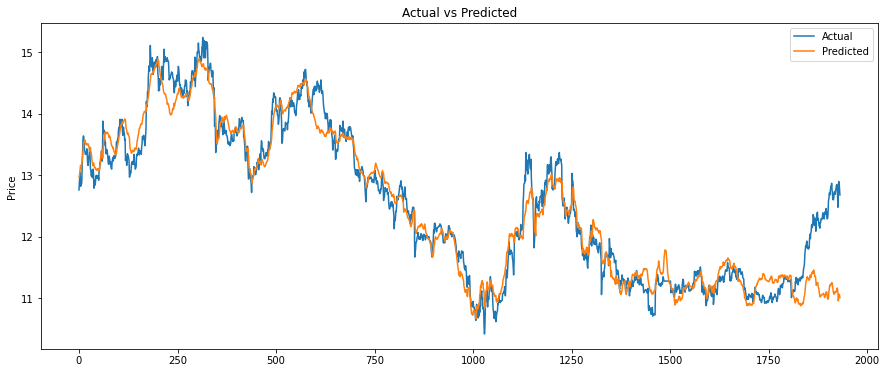

Train Score: 0.36 RMSE, 0.13 MSE, 0.24 MAE
16/16 [==============================] - 0s 2ms/step


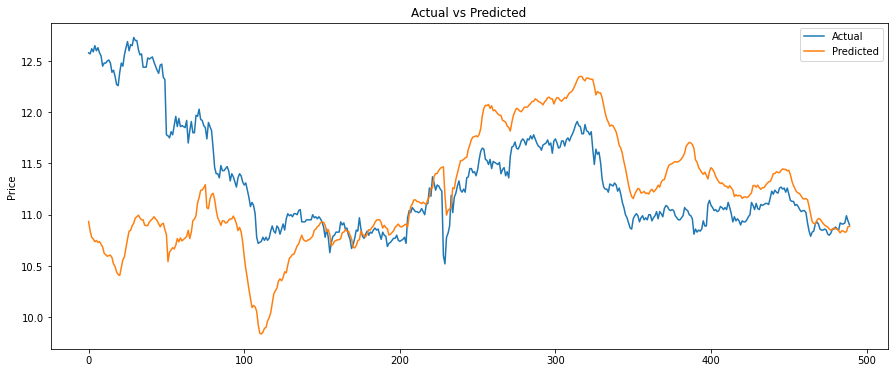

Test Score: 0.70 RMSE, 0.50 MSE, 0.50 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1920, 36, 20).
trainY shape == (1920, 1).
testX shape == (490, 36, 20).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_79 (GRU)                (None, 36, 8)             720       
                                                                 
 dropout_79 (Dropout)        (None, 36, 8)             0         
                                                                 
 gru_80 (GRU)                (None, 8)                 432       
                                                                 
 dropout_80 (Dropout)        (None, 8)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_8_36/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 2ms/step


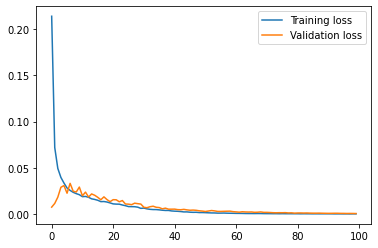

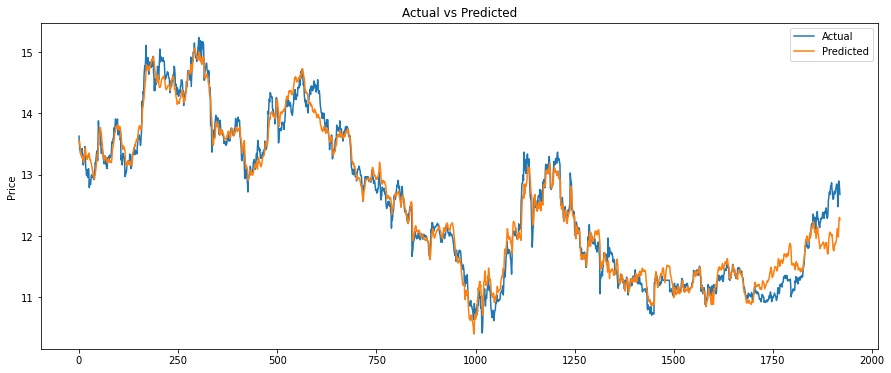

Train Score: 0.22 RMSE, 0.05 MSE, 0.16 MAE
16/16 [==============================] - 0s 2ms/step


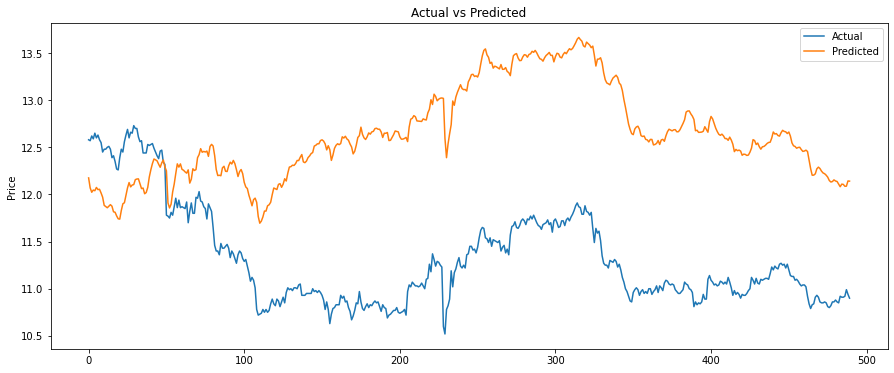

Test Score: 1.50 RMSE, 2.24 MSE, 1.40 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1908, 48, 20).
trainY shape == (1908, 1).
testX shape == (490, 48, 20).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_81 (GRU)                (None, 48, 8)             720       
                                                                 
 dropout_81 (Dropout)        (None, 48, 8)             0         
                                                                 
 gru_82 (GRU)                (None, 8)                 432       
                                                                 
 dropout_82 (Dropout)        (None, 8)                 0         
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_8_48/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 2ms/step


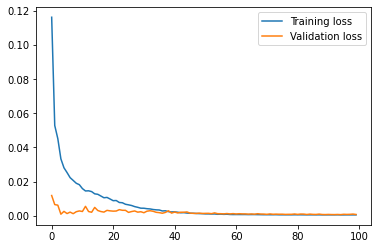

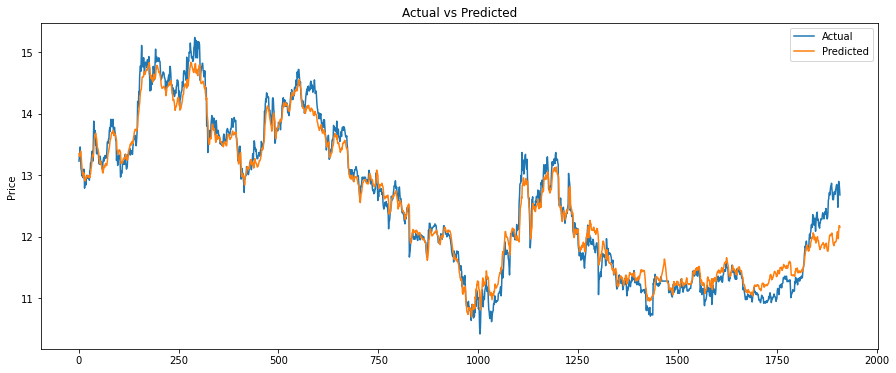

Train Score: 0.21 RMSE, 0.04 MSE, 0.16 MAE
16/16 [==============================] - 0s 2ms/step


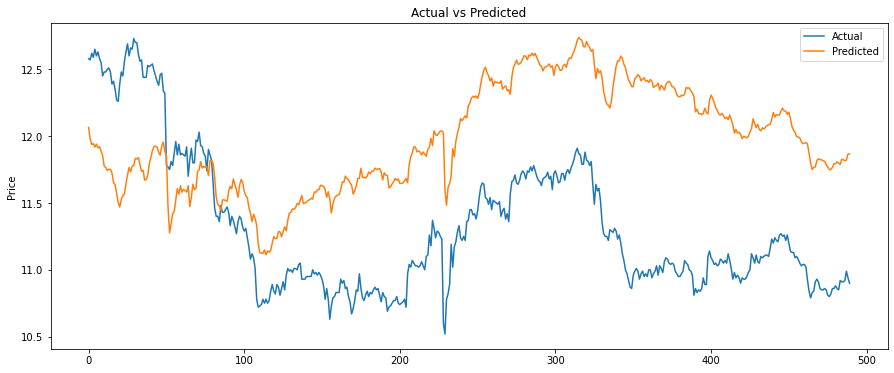

Test Score: 0.89 RMSE, 0.79 MSE, 0.82 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1896, 60, 20).
trainY shape == (1896, 1).
testX shape == (490, 60, 20).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_83 (GRU)                (None, 60, 8)             720       
                                                                 
 dropout_83 (Dropout)        (None, 60, 8)             0         
                                                                 
 gru_84 (GRU)                (None, 8)                 432       
                                                                 
 dropout_84 (Dropout)        (None, 8)                 0         
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1161 (4.54 KB)
Trainable params: 1161 (4.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_8_60/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 2ms/step


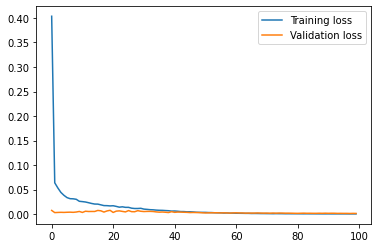

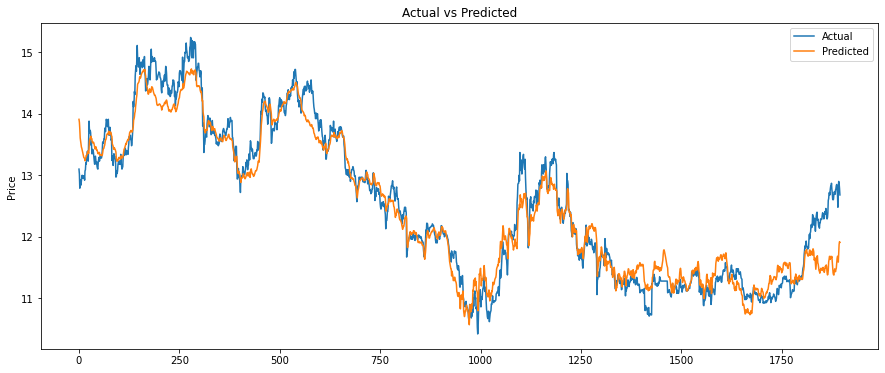

Train Score: 0.30 RMSE, 0.09 MSE, 0.22 MAE
16/16 [==============================] - 0s 4ms/step


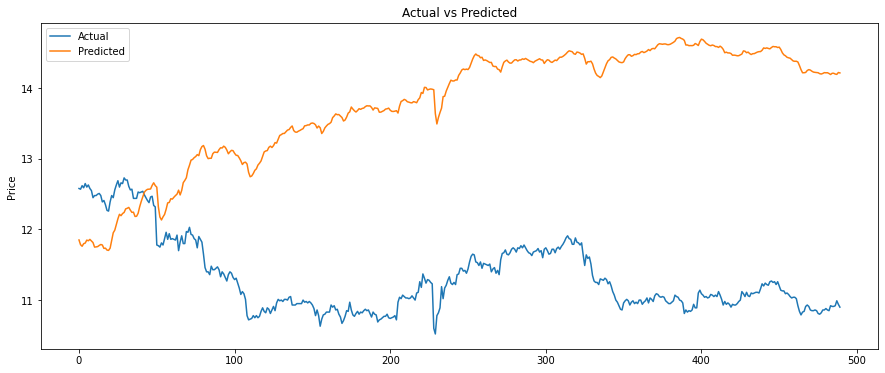

Test Score: 2.72 RMSE, 7.42 MSE, 2.54 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1944, 12, 20).
trainY shape == (1944, 1).
testX shape == (490, 12, 20).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_85 (GRU)                (None, 12, 16)            1824      
                                                                 
 dropout_85 (Dropout)        (None, 12, 16)            0         
                                                                 
 gru_86 (GRU)                (None, 16)                1632      
                                                                 
 dropout_86 (Dropout)        (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3473 (13.57 KB)
Trainable params: 3473 (13.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_16_12/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 922us/step


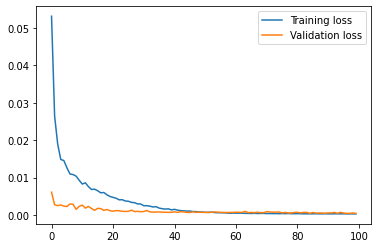

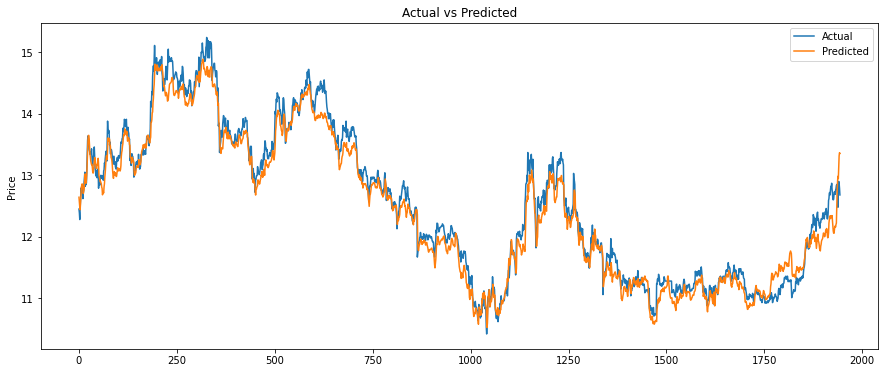

Train Score: 0.21 RMSE, 0.05 MSE, 0.17 MAE
16/16 [==============================] - 0s 1ms/step


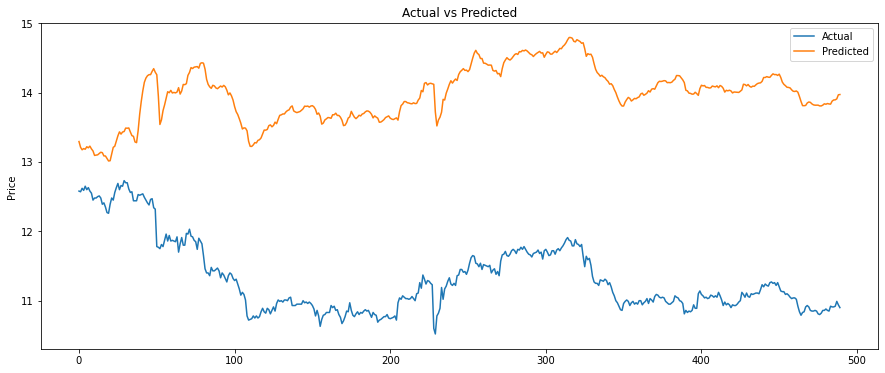

Test Score: 2.73 RMSE, 7.43 MSE, 2.65 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1932, 24, 20).
trainY shape == (1932, 1).
testX shape == (490, 24, 20).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_87 (GRU)                (None, 24, 16)            1824      
                                                                 
 dropout_87 (Dropout)        (None, 24, 16)            0         
                                                                 
 gru_88 (GRU)                (None, 16)                1632      
                                                                 
 dropout_88 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3473 (13.57 KB)
Trainable params: 3473 (13.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_16_24/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 1ms/step


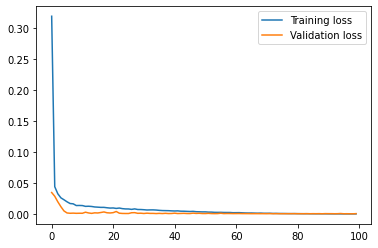

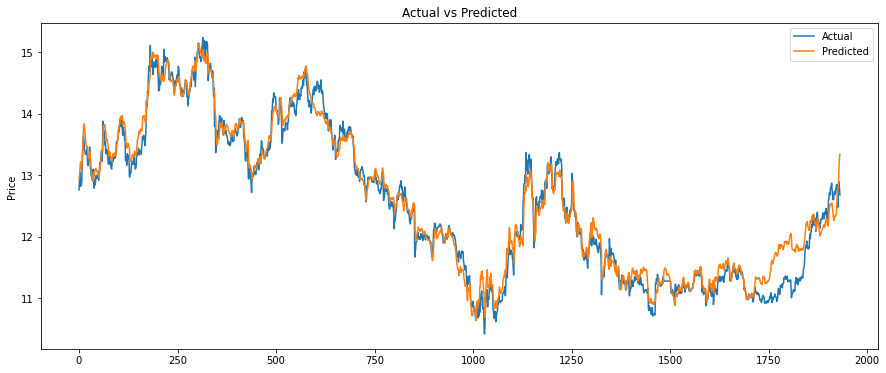

Train Score: 0.22 RMSE, 0.05 MSE, 0.16 MAE
16/16 [==============================] - 0s 2ms/step


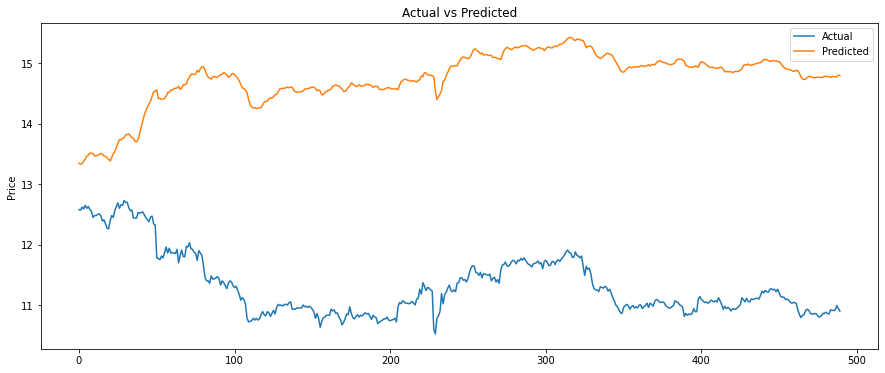

Test Score: 3.52 RMSE, 12.36 MSE, 3.42 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1920, 36, 20).
trainY shape == (1920, 1).
testX shape == (490, 36, 20).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_89 (GRU)                (None, 36, 16)            1824      
                                                                 
 dropout_89 (Dropout)        (None, 36, 16)            0         
                                                                 
 gru_90 (GRU)                (None, 16)                1632      
                                                                 
 dropout_90 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3473 (13.57 KB)
Trainable params: 3473 (13.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_16_36/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 2ms/step


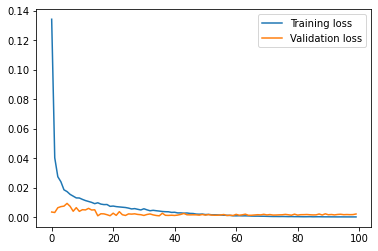

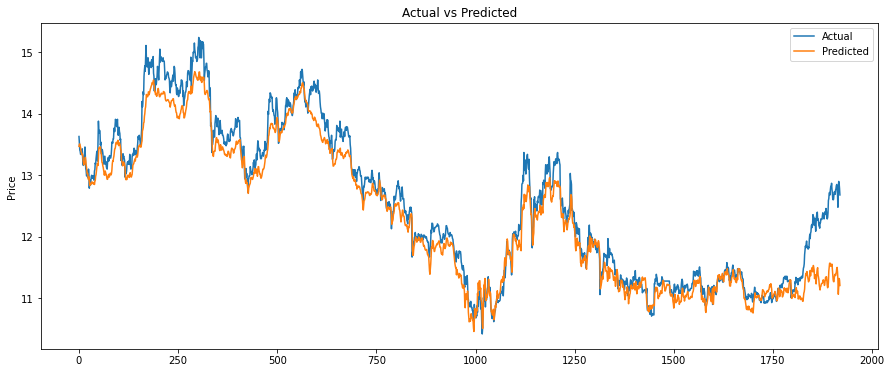

Train Score: 0.33 RMSE, 0.11 MSE, 0.24 MAE
16/16 [==============================] - 0s 2ms/step


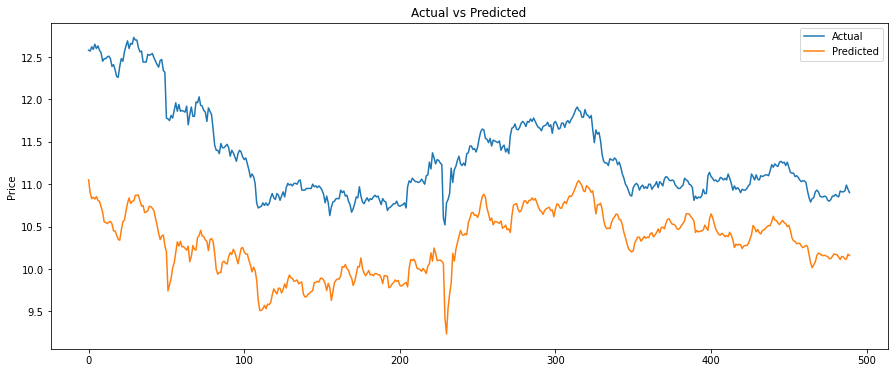

Test Score: 1.09 RMSE, 1.18 MSE, 1.01 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1908, 48, 20).
trainY shape == (1908, 1).
testX shape == (490, 48, 20).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_91 (GRU)                (None, 48, 16)            1824      
                                                                 
 dropout_91 (Dropout)        (None, 48, 16)            0         
                                                                 
 gru_92 (GRU)                (None, 16)                1632      
                                                                 
 dropout_92 (Dropout)        (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3473 (13.57 KB)
Trainable params: 3473 (13.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_16_48/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 2ms/step


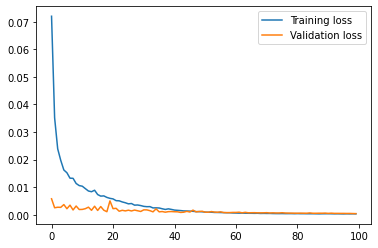

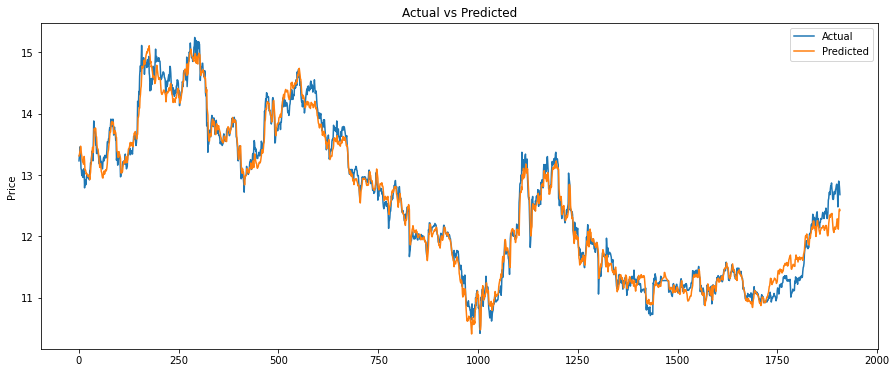

Train Score: 0.17 RMSE, 0.03 MSE, 0.13 MAE
16/16 [==============================] - 0s 3ms/step


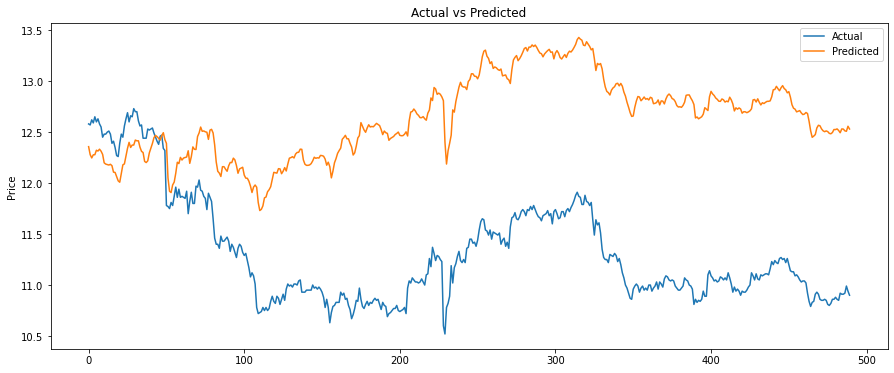

Test Score: 1.45 RMSE, 2.11 MSE, 1.36 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1896, 60, 20).
trainY shape == (1896, 1).
testX shape == (490, 60, 20).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_93 (GRU)                (None, 60, 16)            1824      
                                                                 
 dropout_93 (Dropout)        (None, 60, 16)            0         
                                                                 
 gru_94 (GRU)                (None, 16)                1632      
                                                                 
 dropout_94 (Dropout)        (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3473 (13.57 KB)
Trainable params: 3473 (13.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_16_60/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 3ms/step


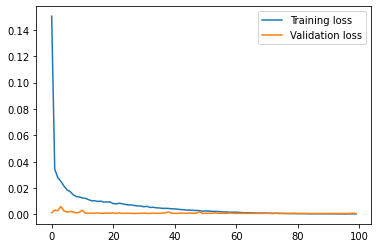

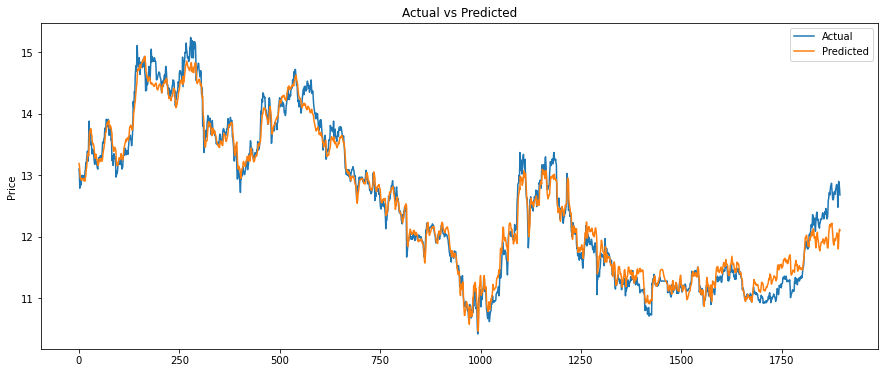

Train Score: 0.20 RMSE, 0.04 MSE, 0.15 MAE
16/16 [==============================] - 0s 3ms/step


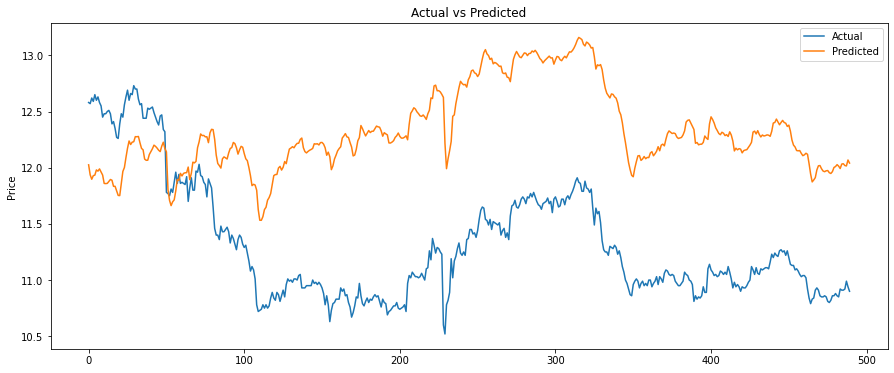

Test Score: 1.16 RMSE, 1.36 MSE, 1.10 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1944, 12, 20).
trainY shape == (1944, 1).
testX shape == (490, 12, 20).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_95 (GRU)                (None, 12, 32)            5184      
                                                                 
 dropout_95 (Dropout)        (None, 12, 32)            0         
                                                                 
 gru_96 (GRU)                (None, 32)                6336      
                                                                 
 dropout_96 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11553 (45.13 KB)
Trainable params: 11553 (45.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_32_12/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 1ms/step


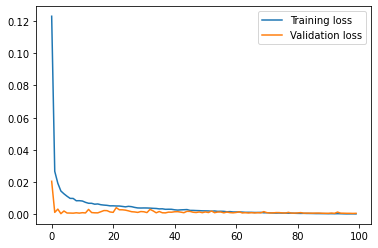

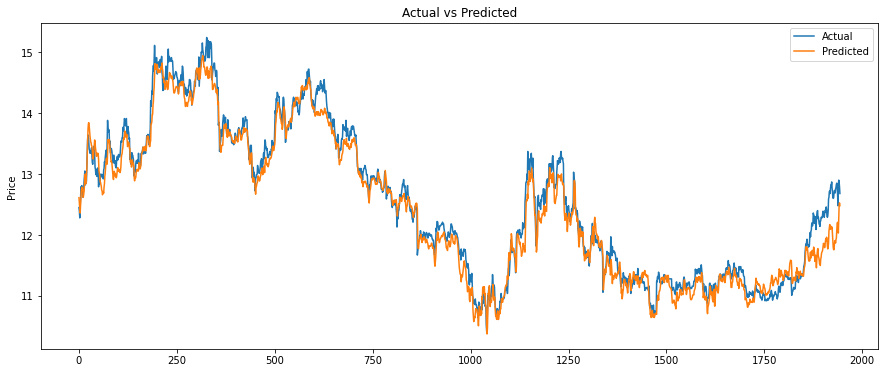

Train Score: 0.22 RMSE, 0.05 MSE, 0.17 MAE
16/16 [==============================] - 0s 2ms/step


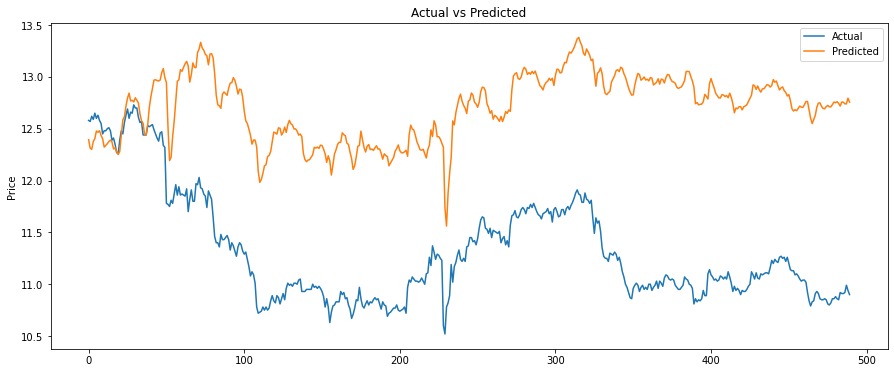

Test Score: 1.47 RMSE, 2.17 MSE, 1.39 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1932, 24, 20).
trainY shape == (1932, 1).
testX shape == (490, 24, 20).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_97 (GRU)                (None, 24, 32)            5184      
                                                                 
 dropout_97 (Dropout)        (None, 24, 32)            0         
                                                                 
 gru_98 (GRU)                (None, 32)                6336      
                                                                 
 dropout_98 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11553 (45.13 KB)
Trainable params: 11553 (45.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_32_24/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 2ms/step


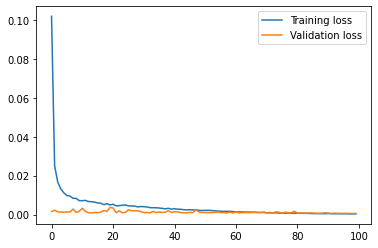

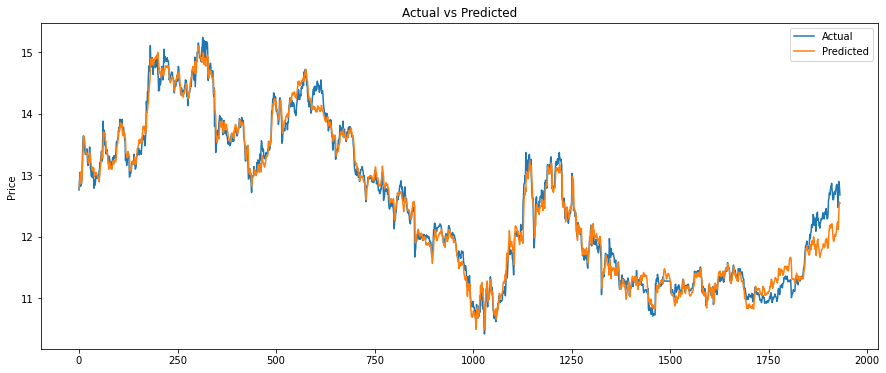

Train Score: 0.18 RMSE, 0.03 MSE, 0.13 MAE
16/16 [==============================] - 0s 5ms/step


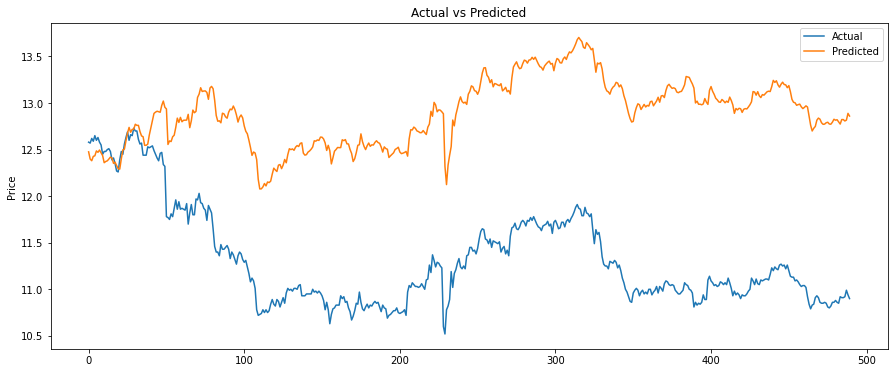

Test Score: 1.67 RMSE, 2.78 MSE, 1.57 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1920, 36, 20).
trainY shape == (1920, 1).
testX shape == (490, 36, 20).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_99 (GRU)                (None, 36, 32)            5184      
                                                                 
 dropout_99 (Dropout)        (None, 36, 32)            0         
                                                                 
 gru_100 (GRU)               (None, 32)                6336      
                                                                 
 dropout_100 (Dropout)       (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11553 (45.13 KB)
Trainable params: 11553 (45.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_32_36/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 2ms/step


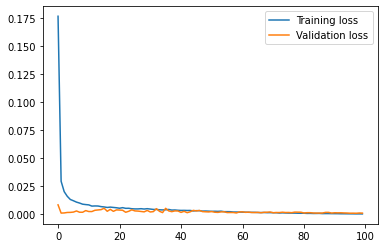

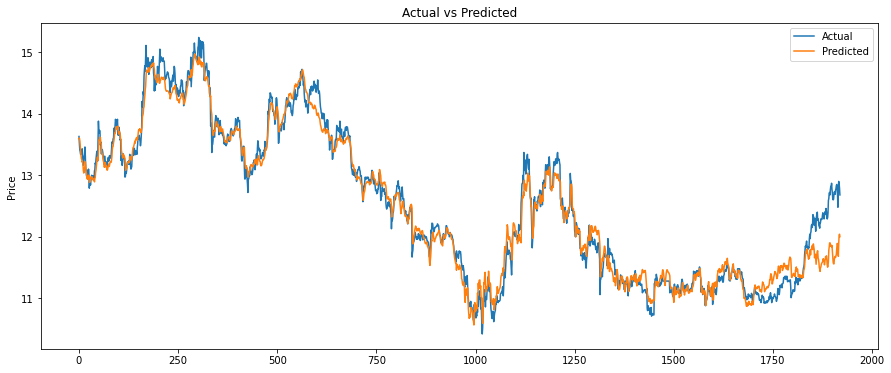

Train Score: 0.23 RMSE, 0.05 MSE, 0.16 MAE
16/16 [==============================] - 0s 2ms/step


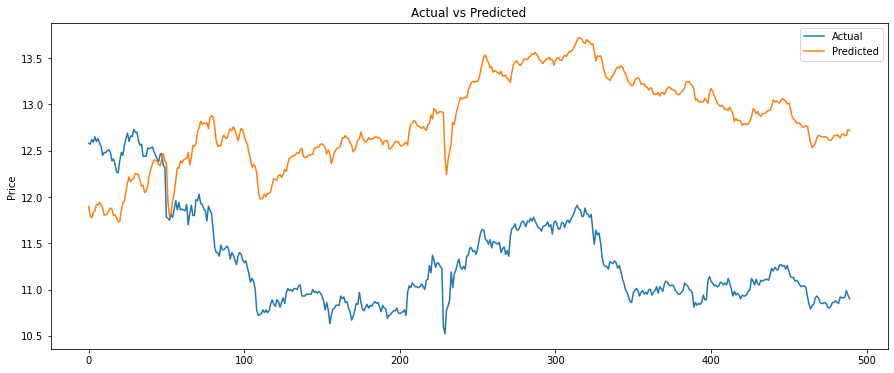

Test Score: 1.67 RMSE, 2.77 MSE, 1.58 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1908, 48, 20).
trainY shape == (1908, 1).
testX shape == (490, 48, 20).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_101 (GRU)               (None, 48, 32)            5184      
                                                                 
 dropout_101 (Dropout)       (None, 48, 32)            0         
                                                                 
 gru_102 (GRU)               (None, 32)                6336      
                                                                 
 dropout_102 (Dropout)       (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11553 (45.13 KB)
Trainable params: 11553 (45.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_32_48/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 3ms/step


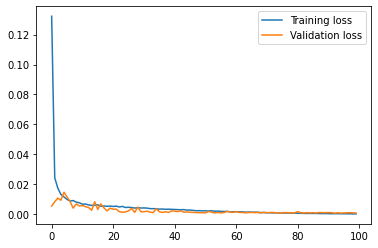

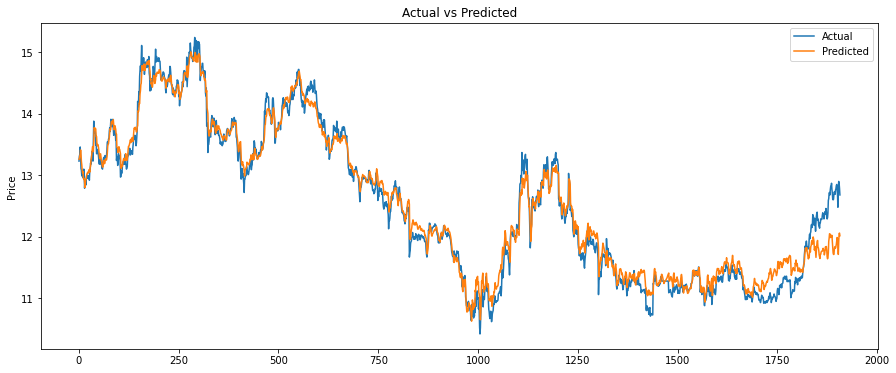

Train Score: 0.21 RMSE, 0.04 MSE, 0.15 MAE
16/16 [==============================] - 0s 6ms/step


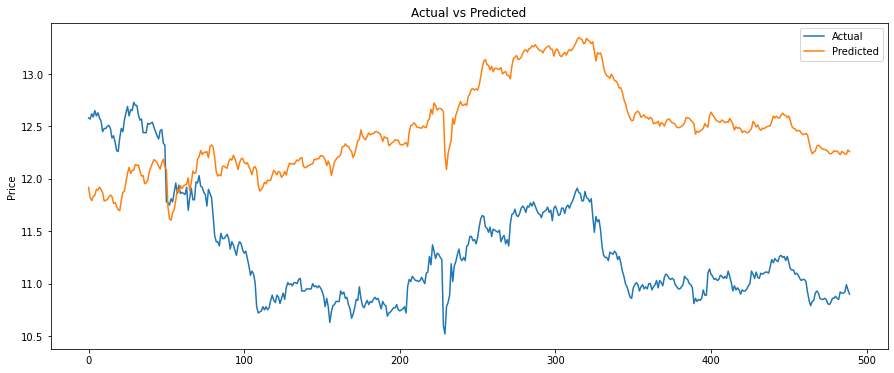

Test Score: 1.33 RMSE, 1.76 MSE, 1.26 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1896, 60, 20).
trainY shape == (1896, 1).
testX shape == (490, 60, 20).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_103 (GRU)               (None, 60, 32)            5184      
                                                                 
 dropout_103 (Dropout)       (None, 60, 32)            0         
                                                                 
 gru_104 (GRU)               (None, 32)                6336      
                                                                 
 dropout_104 (Dropout)       (None, 32)                0         
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11553 (45.13 KB)
Trainable params: 11553 (45.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/GRU_A2_2_32_60/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
60/60 [==============================] - 0s 3ms/step


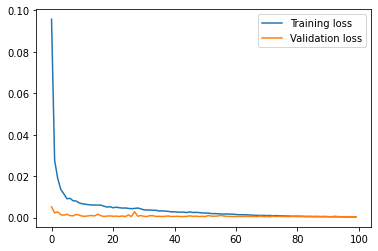

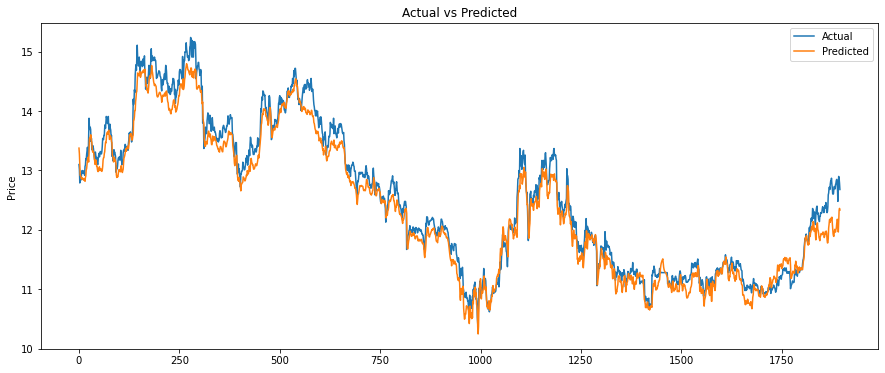

Train Score: 0.23 RMSE, 0.05 MSE, 0.19 MAE
16/16 [==============================] - 0s 4ms/step


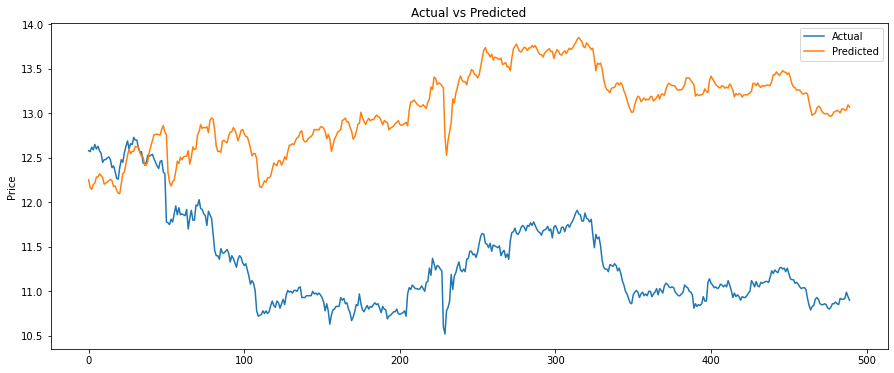

Test Score: 1.87 RMSE, 3.51 MSE, 1.76 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1944, 12, 20).
trainY shape == (1944, 1).
testX shape == (490, 12, 20).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_105 (GRU)               (None, 12, 8)             720       
                                                                 
 dropout_105 (Dropout)       (None, 12, 8)             0         
                                                                 
 gru_106 (GRU)               (None, 12, 8)             432       
                                                                 
 dropout_106 (Dropout)       (None, 12, 8)             0         
                                                                 
 gru_107 (GRU)               (None, 8)                 432       
                                                                 
 dropout_107 (Dropout)       (None, 8)                 0         
                                                                 
 dense_45 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/GRU_A2_3_8_12/assets


[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
61/61 [==============================] - 0s 1ms/step


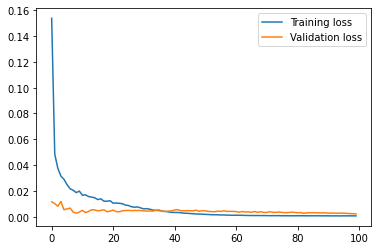

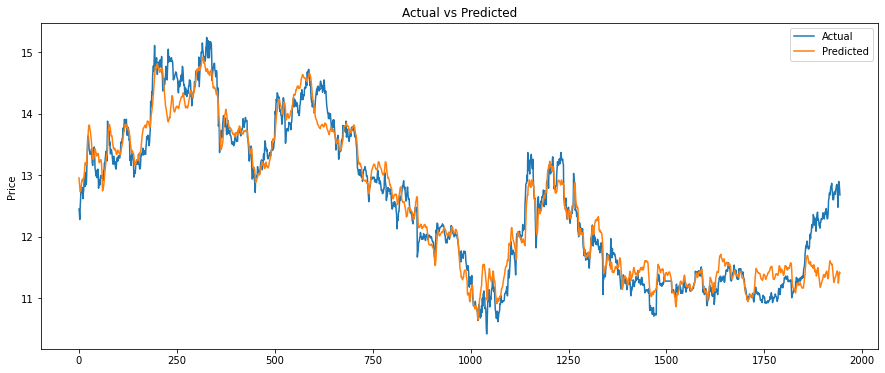

Train Score: 0.32 RMSE, 0.11 MSE, 0.23 MAE
16/16 [==============================] - 0s 5ms/step


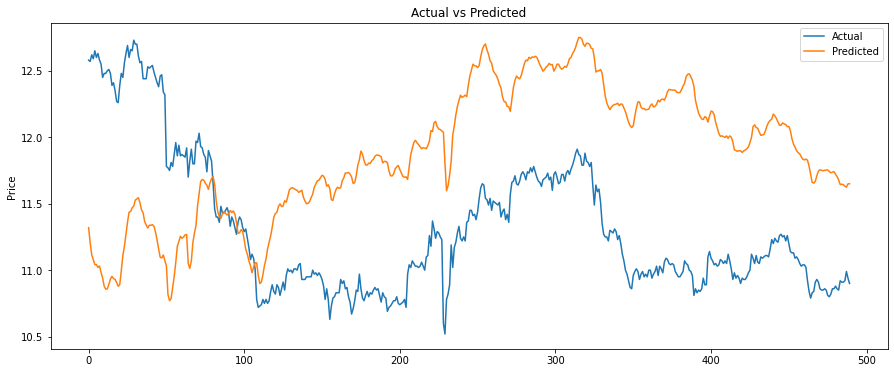

Test Score: 0.96 RMSE, 0.92 MSE, 0.90 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   5   6   8  10  12  13  15  33  36  39  41  42  44  46  66  67  78
  92 105]
(2446, 20)
trainX shape == (1932, 24, 20).
trainY shape == (1932, 1).
testX shape == (490, 24, 20).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_108 (GRU)               (None, 24, 8)             720       
                                                                 
 dropout_108 (Dropout)       (None, 24, 8)             0         
                                                                 
 gru_109 (GRU)               (None, 24, 8)             432       
                                                                 
 dropout_109 (Dropout)       (None, 24, 8)             0         
                                                                 
 gru_110 (GRU)               (None, 8)                 432       
                                                                 
 dropout_110 (Dropout)       (None, 8)                 0         
                                                                 
 dense_46 (Dense)            (None, 1)     

In [4]:
# alphas = [0.01, 0.001, 0.0001, 0.00001]
alphas = [0.001]
# 아래는 수행 완료.
# 0.01, 0.0001

layers = [2, 3]
neurons = [8, 16, 32]
look_back = [12, 24, 36, 48, 60]

# Assuming you have a correct size for your matrix based on your parameters
n_rows = len(alphas) * len(layers) * len(neurons) * len(look_back)
matrix = np.zeros((n_rows, 4), dtype=np.int32)

index = 0
for alpha in alphas:
    for layer in layers:
        for neuron in neurons:
            for lb in look_back:
                # Ensure we don't exceed the size of the matrix
                if index < n_rows:
                    matrix[index] = [alpha, layer, neuron, lb]
                    index += 1
                else:
                    print(f'Exceeded matrix size at index {index}')

csv_file = 'result.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Model Name', 'Train RMSE', 'Train MSE', 'Train MAE', 'Test RMSE', 'Test MSE', 'Test MAE'])
    
    # Extracting variables using a triple nested loop
    for i in range(matrix.shape[0]):
        alpha_val = matrix[i][0]
        layer_val = matrix[i][1]
        neuron_val = matrix[i][2]
        look_back_val = matrix[i][3]
        
        model_name = f"./models/GRU_A2_{layer_val}_{neuron_val}_{look_back_val}"
        
        # price col 위치 재조정.
        cols = list(cosmos_df.columns)
        cols.insert(1, cols.pop(cols.index('price')))
        # Reindex the DataFrame
        cosmos_df = cosmos_df.loc[:, cols]

        cols = list(cosmos_df)[1:cosmos_df.shape[1]]
        df_for_training = cosmos_df[cols].astype(float)
        print(df_for_training.shape)

        scaler = MaxAbsScaler()
        scaler.fit(df_for_training)
        df_for_training_scaled = scaler.transform(df_for_training)
        print(df_for_training_scaled.shape)

        # Lasso Regression for feature selection
        lasso = Lasso(alpha=0.0001)
        # Assume 'price' is the first column after reindexing and the target to predict
        lasso.fit(df_for_training_scaled[:, 1:], df_for_training_scaled[:, 0])

        print(df_for_training_scaled.shape)
        # (2446, 110)

        # Use Lasso for feature selection
        selected_features = np.where(lasso.coef_!=0)[0]
        print(selected_features)

        # Update your train data according to selected features
        df_for_training_scaled_selected = df_for_training_scaled[:, selected_features]
        print(df_for_training_scaled_selected.shape)
        
        trainX = []
        trainY = []

        n_future = 1 
        n_past = look_back_val

        # define the point to split the data into training and testing
        split_point = int(df_for_training_scaled_selected.shape[0]*0.8) 

        # construct training part
        for i in range(n_past, split_point):
            trainX.append(df_for_training_scaled_selected[i - n_past:i, 0:df_for_training_scaled_selected.shape[1]])
            trainY.append(df_for_training_scaled_selected[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        print('trainX shape == {}.'.format(trainX.shape))
        print('trainY shape == {}.'.format(trainY.shape))

        # construct testing part
        testX = []
        testY = []

        for i in range(split_point, len(df_for_training_scaled_selected) - n_future +1):
            testX.append(df_for_training_scaled_selected[i - n_past:i, 0:df_for_training_scaled_selected.shape[1]])
            testY.append(df_for_training_scaled_selected[i + n_future - 1:i + n_future, 0])

        testX, testY = np.array(testX), np.array(testY)

        print('testX shape == {}.'.format(testX.shape))
        print('testY shape == {}.'.format(testY.shape))
        
        model = Sequential()
        if(layer_val == 2):
            model.add(GRU(neuron_val, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(GRU(neuron_val, activation='tanh', return_sequences=False))
            model.add(Dropout(0.2))
            model.add(Dense(trainY.shape[1]))
            print(trainY.shape)
        elif(layer_val == 3):
            model.add(GRU(neuron_val, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(GRU(neuron_val, activation='tanh', return_sequences=True))
            model.add(Dropout(0.2))
            model.add(GRU(neuron_val, activation='tanh', return_sequences=False))
            model.add(Dropout(0.2))
            model.add(Dense(trainY.shape[1]))
            print(trainY.shape)

        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='mse')
        model.summary()

        # fit the model
        history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Validation loss')
        plt.legend()

        # save the model to disk
        model.save(model_name)
        
        # load the model from disk
        model = load_model(model_name)

        # Fit a new scaler to the selected features only
        scaler_selected = MaxAbsScaler()
        print(selected_features)
        scaler_selected.fit(df_for_training.iloc[:, np.concatenate(([0], selected_features + 1))])

        def evaluate_model(model, X, y_true, scaler, selected_features, filename):
            # Predict
            y_pred = model.predict(X)

            # Create dummy arrays for inverse transform
            dummy_pred = np.zeros((len(y_pred), len(selected_features) + 1))
            dummy_true = np.zeros((len(y_true), len(selected_features) + 1))
            
            # Replace the first column with predicted and actual values
            dummy_pred[:,0] = y_pred[:,0]
            dummy_true[:,0] = y_true[:,0]
            
            # Inverse transform
            y_pred_rescaled = scaler.inverse_transform(dummy_pred)[:,0]
            y_true_rescaled = scaler.inverse_transform(dummy_true)[:,0]
            
            rmse = sqrt(mean_squared_error(y_true_rescaled, y_pred_rescaled))
            mse = mean_squared_error(y_true_rescaled, y_pred_rescaled)
            mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
            
            # Plot actual vs predicted values
            plt.figure(figsize=(15, 6))
            plt.plot(y_true_rescaled, label='Actual')
            plt.plot(y_pred_rescaled, label='Predicted')
            plt.title('Actual vs Predicted')
            plt.ylabel('Price')
            plt.legend()
            plt.savefig(filename)
            plt.show()
            
            return rmse, mse, mae

        trainAsset = f"./results/train/GRU_A2_{layer_val}_{neuron_val}_{look_back_val}_train.png"
        testAsset = f"./results/test/GRU_A2_{layer_val}_{neuron_val}_{look_back_val}_test.png"

        # Call the function for training data
        train_rmse, train_mse, train_mae = evaluate_model(model, trainX, trainY, scaler_selected, selected_features, trainAsset)
        print('Train Score: %.2f RMSE, %.2f MSE, %.2f MAE' % (train_rmse, train_mse, train_mae))

        # Call the function for testing data
        test_rmse, test_mse, test_mae = evaluate_model(model, testX, testY, scaler_selected, selected_features, testAsset)
        print('Test Score: %.2f RMSE, %.2f MSE, %.2f MAE' % (test_rmse, test_mse, test_mae))
        
        writer.writerow([model_name, train_rmse, train_mse, train_mae, test_rmse, test_mse, test_mae])

print(f"Results saved to {csv_file}.")
